In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


In [5]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("sample1.csv")


In [6]:
df_train.head()



,Id,Prediction
0,1,1.611879
1,2,1.645086
2,3,1.538760
3,4,1.781919
4,5,2.290673


In [5]:
new_df=df_train[["smiles",'gap']]

In [6]:
colList = df_train.columns[1:]
newList = []
for col in colList: 
    if (df_train[col].sum(axis=0) != 0):
        new_df[col]=df_train[col]
        newList.append(col)

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [11]:
df_train.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,feat_011,feat_012,feat_013,feat_014,feat_015,feat_016,feat_017,feat_018,feat_019,feat_020,feat_021,feat_022,feat_023,feat_024,feat_025,feat_026,feat_027,feat_028,feat_029,feat_030,feat_031,feat_032,feat_033,feat_034,feat_035,feat_036,feat_037,feat_038,feat_039,feat_040,feat_041,feat_042,feat_043,feat_044,feat_045,feat_046,feat_047,feat_048,feat_049,...,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.98


In [5]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(df_train, train_size=0.7)
Xtrain = itrain.drop(["smiles",'gap'], axis=1)
ytrain = itrain.gap
Xtest = itest.drop(["smiles",'gap'], axis=1)
ytest= itest.gap

In [6]:
#Linear Regression
LR = LinearRegression()
LR.fit(Xtrain, ytrain)
LR_pred = LR.predict(Xtest)

In [7]:
#Feture from LG
feature=[]
for i in xrange(len(LR.coef_)):
    coef=LR.coef_[i]
    if coef !=0.0:
        feature.append(i)

In [8]:
#Feature from LG
LR_feature=[]
feat=Xtrain.columns.values.tolist()
new_features=[]
for j in feature:
    new_feature=feat[j]
    LR_feature.append(new_feature)

In [12]:
sub_df=df_train[["smiles",'gap']]


In [47]:
df_test

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,feat_011,feat_012,feat_013,feat_014,feat_015,feat_016,feat_017,feat_018,feat_019,feat_020,feat_021,feat_022,feat_023,feat_024,feat_025,feat_026,feat_027,feat_028,feat_029,feat_030,feat_031,feat_032,feat_033,feat_034,feat_035,feat_036,feat_037,feat_038,feat_039,feat_040,feat_041,feat_042,feat_043,feat_044,feat_045,feat_046,feat_047,feat_048,...,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,6,c1cc2sc3c4[SiH2]C(=Cc4ncc3c2s1)c1cccnc1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,7,[nH]1cccc1-c1cc2c3c[nH]cc3c3c4CC=Cc4[nH]c3c2c2...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,8,C1=CC=C([SiH2]1)c1cc2ncc3c4cnccc4c4=CCC=c4c3c2...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8,9,c1sc(-c2sc(-c3ccc(cc3)-c3scc4nccnc34)c3cc[se]c...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,10,[nH]1c(cc2c3c[nH]cc3c3c4occc4ncc3c12)-c1scc2[n...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [9]:
df_train.sort(columns='gap')

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,feat_011,feat_012,feat_013,feat_014,feat_015,feat_016,feat_017,feat_018,feat_019,feat_020,feat_021,feat_022,feat_023,feat_024,feat_025,feat_026,feat_027,feat_028,feat_029,feat_030,feat_031,feat_032,feat_033,feat_034,feat_035,feat_036,feat_037,feat_038,feat_039,feat_040,feat_041,feat_042,feat_043,feat_044,feat_045,feat_046,feat_047,feat_048,feat_049,...,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
827004,[nH]1c(cc2[nH]c3c(c4cocc4c4ccc5nsnc5c34)c12)C1...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,-1.44
320586,c1sc(-c2cc3sc4c(cnc5ccc6cscc6c45)c3o2)c2nccnc12,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.91
998545,c1[SiH2]c2c(c1)c1nsnc1c1c2c2cocc2c2ccc3nsnc3c12,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.01
327950,c1ccc([se]1)-c1ccc(-c2ccc(cn2)-c2cncc3nsnc23)c...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.57
875763,c1sc(-c2sc(-c3cnc(-c4scc5cc[nH]c45)c4nsnc34)c3...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.66
567908,c1sc(-c2ncc(-c3sc(-c4scc5[nH]ccc45)c4cc[nH]c34...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.67
290121,c1sc(-c2sc(-c3cnc(-c4scc5occc45)c4nsnc34)c3[nH...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.69
915282,c1sc(-c2sc(-c3cnc(-c4scc5[nH]ccc45)c4nsnc34)c3...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.70
601509,c1sc(-c2sc(-c3sc(-c4cncc5nsnc45)c4[nH]ccc34)c3...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.71
937771,c1sc(-c2sc(-c3sc(-c4cncc5nsnc45)c4[nH]ccc34)c3...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.72


In [49]:
df= df_train[["smiles"]]

In [13]:
df3= df_test[["smiles"]]

In [14]:
df4= df_test[["smiles"]]

In [36]:
last=len(newList)-1
last

29

In [37]:

allnew_feat={}
j=0
i=256
for x in xrange(30):
    feat1=newList[x]
    last=len(newList)-1
    rest=30-x
    for y in xrange(rest):
        z=x+y
        feat2=newList[z]
        if feat1!=feat2:
            i=i+1
            name="feat_"+str(i)
            new_feat=df_train[feat1]+df_train[feat2]
            df[name]=new_feat

        
           

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [41]:
df2= df_train[["smiles",'gap']]

In [43]:
allnew_feat={}
j=0
i=691
for x in xrange(30):
    feat1=newList[x]
    last=len(newList)-1
    rest=30-x
    for y in xrange(rest):
        z=x+y
        feat2=newList[z]
        if feat1!=feat2:
            i=i+1
            name="feat_"+str(i)
            new_feat=df_train[feat1]*df_train[feat2]
            df2[name]=new_feat

In [39]:
df.head()

,smiles,gap,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,...,feat_642,feat_643,feat_644,feat_645,feat_646,feat_647,feat_648,feat_649,feat_650,feat_651,feat_652,feat_653,feat_654,feat_655,feat_656,feat_657,feat_658,feat_659,feat_660,feat_661,feat_662,feat_663,feat_664,feat_665,feat_666,feat_667,feat_668,feat_669,feat_670,feat_671,feat_672,feat_673,feat_674,feat_675,feat_676,feat_677,feat_678,feat_679,feat_680,feat_681,feat_682,feat_683,feat_684,feat_685,feat_686,feat_687,feat_688,feat_689,feat_690,feat_691
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,1.19,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,2,1,1,1,2,1,2,1,2,1,2,1,2,2,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,2,1,1,0,1
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.60,2,1,2,2,2,1,1,2,2,1,2,2,1,1,2,2,2,1,2,1,1,1,1,2,1,2,1,2,2,1,2,2,2,1,1,2,2,1,2,2,1,1,2,2,2,1,2,1,...,1,2,1,2,2,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,2,1,2,2,1,0,1,1,1,2,2,1,1,2
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.49,2,2,2,1,2,1,2,2,2,2,2,1,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,1,2,2,1,2,1,2,2,2,2,2,1,2,2,2,2,2,1,1,1,...,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,2,2,1,2,1,1
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.36,2,2,2,2,1,1,2,1,1,2,2,2,1,2,2,2,2,1,1,1,1,1,1,2,1,2,2,2,1,2,2,2,1,1,2,1,1,2,2,2,1,2,2,2,2,1,1,1,...,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,1,2,2,2,1,1,1,1,0,2,2,1,2,1,1
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,1.98,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,2,1,1,1,1,1,2,1,2,1,2,1,2,2,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,2,1,2,1,0,1,0,1,0,1,0,1,0,1,2,1,1,0,1


In [44]:
df2.head()

,smiles,gap,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,...,feat_1077,feat_1078,feat_1079,feat_1080,feat_1081,feat_1082,feat_1083,feat_1084,feat_1085,feat_1086,feat_1087,feat_1088,feat_1089,feat_1090,feat_1091,feat_1092,feat_1093,feat_1094,feat_1095,feat_1096,feat_1097,feat_1098,feat_1099,feat_1100,feat_1101,feat_1102,feat_1103,feat_1104,feat_1105,feat_1106,feat_1107,feat_1108,feat_1109,feat_1110,feat_1111,feat_1112,feat_1113,feat_1114,feat_1115,feat_1116,feat_1117,feat_1118,feat_1119,feat_1120,feat_1121,feat_1122,feat_1123,feat_1124,feat_1125,feat_1126
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,1.19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.60,1,0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0,1,0,...,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.49,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.36,1,1,1,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,1.98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [40]:
df.to_csv('plusdata.csv')

In [45]:
df2.to_csv('timesdata.csv')

In [51]:
allnew_feat={}
j=0
i=1126
for x in xrange(30):
    feat1=newList[x]
    last=len(newList)-1
    rest=30-x
    for y in xrange(rest):
        z=x+y
        feat2=newList[z]
        if feat1!=feat2:
            i=i+1
            name="feat_"+str(i)
            new_feat=df_train[feat1]*df_train[feat2]
            df3[name]=new_feat

/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [52]:
df3.head()

,smiles,feat_692,feat_693,feat_694,feat_695,feat_696,feat_697,feat_698,feat_699,feat_700,feat_701,feat_702,feat_703,feat_704,feat_705,feat_706,feat_707,feat_708,feat_709,feat_710,feat_711,feat_712,feat_713,feat_714,feat_715,feat_716,feat_717,feat_718,feat_719,feat_720,feat_721,feat_722,feat_723,feat_724,feat_725,feat_726,feat_727,feat_728,feat_729,feat_730,feat_731,feat_732,feat_733,feat_734,feat_735,feat_736,feat_737,feat_738,feat_739,feat_740,...,feat_1077,feat_1078,feat_1079,feat_1080,feat_1081,feat_1082,feat_1083,feat_1084,feat_1085,feat_1086,feat_1087,feat_1088,feat_1089,feat_1090,feat_1091,feat_1092,feat_1093,feat_1094,feat_1095,feat_1096,feat_1097,feat_1098,feat_1099,feat_1100,feat_1101,feat_1102,feat_1103,feat_1104,feat_1105,feat_1106,feat_1107,feat_1108,feat_1109,feat_1110,feat_1111,feat_1112,feat_1113,feat_1114,feat_1115,feat_1116,feat_1117,feat_1118,feat_1119,feat_1120,feat_1121,feat_1122,feat_1123,feat_1124,feat_1125,feat_1126
0,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,1,0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1,0,1,1,0,1,1,1,0,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1
2,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
3,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1,1,1,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0
4,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [53]:
df3.to_csv('test_timesdata.csv')

In [57]:
allnew_feat={}
j=0
i=256
for x in xrange(30):
    feat1=newList[x]
    last=len(newList)-1
    rest=30-x
    for y in xrange(rest):
        z=x+y
        feat2=newList[z]
        if feat1!=feat2:
            i=i+1
            name="feat_"+str(i)
            new_feat=df_train[feat1]+df_train[feat2]
            df4[name]=new_feat



/Users/apple/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [58]:
df4.head()

,smiles,feat_257,feat_258,feat_259,feat_260,feat_261,feat_262,feat_263,feat_264,feat_265,feat_266,feat_267,feat_268,feat_269,feat_270,feat_271,feat_272,feat_273,feat_274,feat_275,feat_276,feat_277,feat_278,feat_279,feat_280,feat_281,feat_282,feat_283,feat_284,feat_285,feat_286,feat_287,feat_288,feat_289,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299,feat_300,feat_301,feat_302,feat_303,feat_304,feat_305,...,feat_642,feat_643,feat_644,feat_645,feat_646,feat_647,feat_648,feat_649,feat_650,feat_651,feat_652,feat_653,feat_654,feat_655,feat_656,feat_657,feat_658,feat_659,feat_660,feat_661,feat_662,feat_663,feat_664,feat_665,feat_666,feat_667,feat_668,feat_669,feat_670,feat_671,feat_672,feat_673,feat_674,feat_675,feat_676,feat_677,feat_678,feat_679,feat_680,feat_681,feat_682,feat_683,feat_684,feat_685,feat_686,feat_687,feat_688,feat_689,feat_690,feat_691
0,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,2,1,1,1,2,1,2,1,2,1,2,1,2,2,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,2,1,1,0,1
1,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,2,1,2,2,2,1,1,2,2,1,2,2,1,1,2,2,2,1,2,1,1,1,1,2,1,2,1,2,2,1,2,2,2,1,1,2,2,1,2,2,1,1,2,2,2,1,2,1,1,...,1,2,1,2,2,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1,0,1,0,1,1,1,2,1,2,2,1,0,1,1,1,2,2,1,1,2
2,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,2,2,2,1,2,1,2,2,2,2,2,1,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,1,2,2,1,2,1,2,2,2,2,2,1,2,2,2,2,2,1,1,1,1,...,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,2,2,1,2,1,1
3,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,2,2,2,2,1,1,2,1,1,2,2,2,1,2,2,2,2,1,1,1,1,1,1,2,1,2,2,2,1,2,2,2,1,1,2,1,1,2,2,2,1,2,2,2,2,1,1,1,1,...,0,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,1,2,2,2,1,1,1,1,0,2,2,1,2,1,1
4,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,2,1,1,1,1,1,2,1,2,1,2,1,2,2,1,1,1,1,1,...,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,2,1,2,1,0,1,0,1,0,1,0,1,0,1,2,1,1,0,1


In [59]:
df4.to_csv('test_plusdata.csv')

In [83]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(df_train, train_size=0.7)

In [84]:
itrain.head(100)


,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,feat_011,feat_012,feat_013,feat_014,feat_015,feat_016,feat_017,feat_018,feat_019,feat_020,feat_021,feat_022,feat_023,feat_024,feat_025,feat_026,feat_027,feat_028,feat_029,feat_030,feat_031,feat_032,feat_033,feat_034,feat_035,feat_036,feat_037,feat_038,feat_039,feat_040,feat_041,feat_042,feat_043,feat_044,feat_045,feat_046,feat_047,feat_048,feat_049,...,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
263902,c1ccc(cc1)-c1ccc(-c2ccc(cn2)-c2cccc3cocc23)c2n...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.95
768563,c1cc2ncc3c4cnc(cc4[se]c3c2s1)-c1scc2cc[nH]c12,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.32
747705,[nH]1c2ccsc2c2cc3ncc(cc3cc12)-c1scc2[nH]ccc12,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.13
546620,c1cnc2c(c1)oc1c2c2ccccc2c2cc(ccc12)-c1ncncn1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.60
191724,C1=CC2=C(C1)C=C([SiH2]2)c1cc2occc2c2c[nH]cc12,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1.89


In [85]:
itest.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,feat_011,feat_012,feat_013,feat_014,feat_015,feat_016,feat_017,feat_018,feat_019,feat_020,feat_021,feat_022,feat_023,feat_024,feat_025,feat_026,feat_027,feat_028,feat_029,feat_030,feat_031,feat_032,feat_033,feat_034,feat_035,feat_036,feat_037,feat_038,feat_039,feat_040,feat_041,feat_042,feat_043,feat_044,feat_045,feat_046,feat_047,feat_048,feat_049,...,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
464463,[nH]1c(cc2c1ccc1=C[SiH2]C=c21)-c1cnc2ccc3cscc3...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1.88
380402,c1ccc(o1)-c1sc(-c2ccc(-c3cccc4c[SiH2]cc34)c3co...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.45
354232,[nH]1cccc1-c1ccc(o1)-c1ccc([se]1)-c1[SiH2]ccc1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1.73
92785,[nH]1cccc1-c1ccc(-c2sc(-c3ccco3)c3Cccc23)c2c[n...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.15
595902,[nH]1c2cc(-c3scc4[nH]ccc34)c3c[nH]cc3c2c2sc3cc...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,2.13


In [92]:
Xtrain = itrain.drop(["smiles",'gap'], axis=1)
ytrain = itrain.gap
Xtest = itest.drop(["smiles",'gap'], axis=1)
ytest= itest.gap

In [93]:
%%time
#Lasso Regression
from sklearn.linear_model import Lasso
compare={}
alphas=[0.1, 0.5, 1, 5,10,20,40]
for alpha in alphas:
        clfLasso_lat = Lasso(alpha=alpha)
        clfLasso_lat.fit(Xtrain, ytrain)
        ypred = clfLasso_lat.predict(Xtest)
        rmse_lat = get_rmse(ytest, ypred)
        compare[alpha]=rmse_lat

In [94]:
compare

{0.1: 0.40738995292196173,
 0.5: 0.40738995292196173,
 1: 0.40738995292196173,
 5: 0.40738995292196173,
 10: 0.40738995292196173,
 20: 0.40738995292196173,
 40: 0.40738995292196173}

In [95]:
%%time
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_compare={}
alphas=[0.1, 0.5, 1, 5,10,20,40]
for alpha in alphas:
        clfRidge = Ridge(alpha=1.0)
        clfRidge.fit(Xtrain, ytrain)
        ypred = clfRidge.predict(Xtest)
        rmse_lat = get_rmse(ytest, ypred)
        ridge_compare[alpha]=rmse_lat

CPU times: user 44.4 s, sys: 5.14 s, total: 49.5 s
Wall time: 19.7 s


In [96]:
ridge_compare

{0.1: 0.29869942407620276,
 0.5: 0.29869942407620276,
 1: 0.29869942407620276,
 5: 0.29869942407620276,
 10: 0.29869942407620276,
 20: 0.29869942407620276,
 40: 0.29869942407620276}

In [ ]:
LR = LinearRegression()
LR.fit(Xtrain, ytrain)
LR_pred = LR.predict(Xtest)

In [ ]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)

In [108]:
LR.coef_

array([  2.13491116e-02,   1.57013908e+11,   2.73117414e+11,
        -7.81367305e+11,   1.58439679e-01,   1.16398747e+09,
         2.25915583e-01,  -1.12772902e+12,  -8.40799554e+10,
        -1.55553594e+11,  -1.88488740e+11,   1.13262356e+11,
        -4.61273903e+09,   2.10518833e+10,  -8.59181688e+11,
        -1.60056452e+11,   3.83903018e+11,   1.87996562e+11,
        -7.66897522e+10,   2.31888545e+11,  -1.72596444e+11,
        -4.52995686e+11,   3.04889061e+11,   5.02639109e+11,
        -5.73224535e-02,  -1.07945189e+10,   3.14648150e+11,
         2.02425909e+11,  -2.35241747e+11,   1.67814235e+11,
        -7.55446206e+11,   5.81744562e+11,  -2.24472115e+11,
        -1.10802957e-04,  -4.57750515e-05,   5.46804035e-05,
         2.26546889e-01,   3.00200108e-07,  -1.16544918e-04,
        -4.23545565e-04,   2.01962105e-04,  -3.30973588e-06,
        -5.62956331e-06,   3.31357782e-01,   5.93509237e-08,
         2.86434641e-09,  -3.22753598e-10,   6.79218461e-11,
         2.02634237e-12,

In [111]:
LR.coef_
feature=[]
for i in xrange(len(LR.coef_)):
    coef=LR.coef_[i]
    if coef !=0.0:
        feature.append(i)
        
        
    
    
    

In [113]:
len(feature)

83

In [123]:
feat=Xtrain.columns.values.tolist()
new_features=[]
for j in feature:
    new_feature=feat[j]
    new_features.append(new_feature)
    

In [131]:
new_Xtrain=itrain[new_features]
new_Xtest=itest[new_features]


In [98]:
LR = LinearRegression()

In [101]:
LR = LinearRegression()
LR.fit(Xtrain, ytrain)
ypred = LR.predict(Xtest)
rmse_lat = get_rmse(ytest, ypred)
ridge_compare["LG_NORMAL"]=rmse_lat

In [100]:
ridge_compare

{0.1: 0.29869942407620276,
 0.5: 0.29869942407620276,
 1: 0.29869942407620276,
 5: 0.29869942407620276,
 10: 0.29869942407620276,
 20: 0.29869942407620276,
 40: 0.29869942407620276,
 'rmse': 0.29869924686904054}

In [102]:
RF = RandomForestRegressor()
RF.fit(Xtrain, ytrain)
RF_pred = RF.predict(Xtest)
rmse_lat = get_rmse(ytest, ypred)
ridge_compare["RF_NORMAL"]=rmse_lat

In [103]:
ridge_compare

{0.1: 0.29869942407620276,
 0.5: 0.29869942407620276,
 1: 0.29869942407620276,
 5: 0.29869942407620276,
 10: 0.29869942407620276,
 20: 0.29869942407620276,
 40: 0.29869942407620276,
 'LG_NORMAL': 0.29869924686904054,
 'RF_NORMAL': 0.29869924686904054,
 'rmse': 0.29869924686904054}

In [106]:
RF_compare={}
trees = [1]+range(2,21,2)    
for tree in trees:
    clfForest1_ct = RandomForestRegressor(n_estimators=tree)
    clfForest1_ct.fit(Xtrain, ytrain)
    ypred= clfForest1_ct.predict(Xtest)
    rmse_lat = get_rmse(ytest, ypred)
    RF_compare[tree]=rmse_lat

In [107]:
RF_compare

{1: 0.27283170084736219,
 2: 0.27258523466088724,
 4: 0.2725179000246965,
 6: 0.27247763686861165,
 8: 0.27243254199110661,
 10: 0.27240670420674357,
 12: 0.27243454440856962,
 14: 0.27240227390255306,
 16: 0.27242241776352083,
 18: 0.272405529715949,
 20: 0.27239764234383529}

In [133]:
NEW_RF_compare={}
trees = [1]+range(2,21,2)    
for tree in trees:
    clfForest1_ct = RandomForestRegressor(n_estimators=tree)
    clfForest1_ct.fit(new_Xtrain, ytrain)
    ypred= clfForest1_ct.predict(new_Xtest)
    rmse_lat = get_rmse(ytest, ypred)
    NEW_RF_compare[tree]=rmse_lat

In [134]:
NEW_RF_compare

{1: 0.27285083325590431,
 2: 0.27260100287987449,
 4: 0.2724969585709236,
 6: 0.27245995083172625,
 8: 0.27241965341969876,
 10: 0.27241670100094589,
 12: 0.27240609100597879,
 14: 0.27243116976113974,
 16: 0.27239984947539769,
 18: 0.27239784098620717,
 20: 0.27239794509566118}

In [139]:

from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor(random_state=0)
DTR.fit(new_Xtrain, ytrain)
ypred= DTR.predict(new_Xtest)
rmse= get_rmse(ytest, ypred)
NEW_RF_compare["DecisionTreeRegressor"]=rmse

In [140]:
NEW_RF_compare

{1: 0.27285083325590431,
 2: 0.27260100287987449,
 4: 0.2724969585709236,
 6: 0.27245995083172625,
 8: 0.27241965341969876,
 10: 0.27241670100094589,
 12: 0.27240609100597879,
 14: 0.27243116976113974,
 16: 0.27239984947539769,
 18: 0.27239784098620717,
 20: 0.27239794509566118,
 'DecisionTreeRegressor': 0.27240791775639434}

In [61]:
gaps=(y_train).tolist()
gaps

[1.1900000000000004,
 1.5999999999999996,
 1.4899999999999998,
 1.36,
 1.9799999999999995,
 1.81,
 2.91,
 2.17,
 2.1900000000000004,
 1.71,
 2.08,
 1.4200000000000004,
 2.96,
 2.59,
 1.14,
 2.54,
 2.370000000000001,
 2.3999999999999995,
 2.0800000000000005,
 1.3400000000000003,
 1.9799999999999995,
 1.3500000000000003,
 2.17,
 2.68,
 1.62,
 1.2199999999999998,
 2.43,
 2.15,
 1.6999999999999995,
 1.7699999999999996,
 1.84,
 2.49,
 1.5,
 2.24,
 2.19,
 2.18,
 1.69,
 1.29,
 2.51,
 1.8100000000000005,
 2.21,
 1.7600000000000002,
 2.0700000000000003,
 1.7400000000000002,
 1.5900000000000003,
 2.01,
 1.29,
 2.0500000000000003,
 2.3800000000000003,
 2.01,
 2.41,
 2.1,
 1.7199999999999998,
 1.34,
 1.79,
 2.18,
 2.39,
 2.120000000000001,
 2.0900000000000003,
 1.16,
 1.5900000000000007,
 1.5499999999999998,
 1.3200000000000005,
 2.1300000000000003,
 2.32,
 2.0499999999999994,
 2.1500000000000004,
 2.86,
 1.6599999999999997,
 2.6,
 1.7200000000000002,
 1.48,
 2.4100000000000006,
 2.18,
 2.15000000

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   3.60000000e+01,   4.51000000e+02,
          2.51400000e+03,   9.04900000e+03,   2.06710000e+04,
          3.37390000e+04,   4.47510000e+04,   5.35300000e+04,
          6.92960000e+04,   8.04400000e+04,   8.81610000e+04,
          9.20370000e+04,   8.37380000e+04,   8.47650000e+04,
          7.97060000e+04,   7.38280000e+04,   5.88090000e+04,
          4.25710000e+04,   3.25230000e+04,   2.11630000e+04,
          1.37000000e+04,   7.37100000e+03,   3.81000000e+03,
          1.90000000e+03,   9.25000000e+02,   3.65000000e+02,
          1.14000000e+02,   1.60000000e+01,   9.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7, 

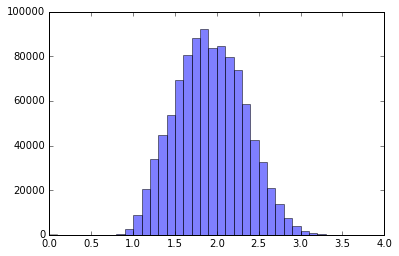

In [70]:
bin_range=np.arange(0,4,0.1).tolist()
import matplotlib.pyplot as plt
plt.hist(gaps,alpha=0.5, bins=bin_range)

In [19]:
test_idx = df_train.shape[0]

In [17]:
df_train = df_train.drop(['gap'], axis=1)

In [8]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)
df_all.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
"""
Example Feature Engineering

this calculates the length of each smile string and adds a feature column with those lengths
Note: this is NOT a good feature and will result in a lower score!
"""
#smiles_len = np.vstack(df_all.smiles.astype(str).apply(lambda x: len(x)))
#df_all['smiles_len'] = pd.DataFrame(smiles_len)


In [20]:
#Drop the 'smiles' column
df_all = df_all.drop(['smiles'], axis=1)
vals = df_all.values
X_train = vals[:test_idx]
X_test = vals[test_idx:]
print "Train features:", X_train.shape
print "Train gap:", Y_train.shape
print "Test features:", X_test.shape

Train features: (1000000, 256)
Train gap: (1000000,)
Test features: (824230, 256)


In [33]:
train_data = small_train.drop(['gap','smiles',"Unnamed: 0"], axis=1)


In [34]:
test_data=small_test.drop(['Id','smiles',"Unnamed: 0"], axis=1)

In [72]:
small_train = pd.read_csv("train_small.csv")
small_test = pd.read_csv("test_small.csv")

In [73]:
small_train.head()

,Unnamed: 0,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,feat_011,feat_012,feat_013,feat_014,feat_015,feat_016,feat_017,feat_018,feat_019,feat_020,feat_021,feat_022,feat_023,feat_024,feat_025,feat_026,feat_027,feat_028,feat_029,feat_030,feat_031,feat_032,feat_033,feat_034,feat_035,feat_036,feat_037,feat_038,feat_039,feat_040,feat_041,feat_042,feat_043,feat_044,feat_045,feat_046,feat_047,feat_048,...,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.19
1,1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.60
2,2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1.49
3,3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1.36
4,4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.98


In [76]:
Xtrain = small_train.drop(['gap','smiles',"Unnamed: 0"], axis=1)
ytrain=small_train.gap.values

In [78]:
small_test

,Unnamed: 0,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,feat_011,feat_012,feat_013,feat_014,feat_015,feat_016,feat_017,feat_018,feat_019,feat_020,feat_021,feat_022,feat_023,feat_024,feat_025,feat_026,feat_027,feat_028,feat_029,feat_030,feat_031,feat_032,feat_033,feat_034,feat_035,feat_036,feat_037,feat_038,feat_039,feat_040,feat_041,feat_042,feat_043,feat_044,feat_045,feat_046,feat_047,...,feat_207,feat_208,feat_209,feat_210,feat_211,feat_212,feat_213,feat_214,feat_215,feat_216,feat_217,feat_218,feat_219,feat_220,feat_221,feat_222,feat_223,feat_224,feat_225,feat_226,feat_227,feat_228,feat_229,feat_230,feat_231,feat_232,feat_233,feat_234,feat_235,feat_236,feat_237,feat_238,feat_239,feat_240,feat_241,feat_242,feat_243,feat_244,feat_245,feat_246,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,5,6,c1cc2sc3c4[SiH2]C(=Cc4ncc3c2s1)c1cccnc1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,6,7,[nH]1cccc1-c1cc2c3c[nH]cc3c3c4CC=Cc4[nH]c3c2c2...,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
7,7,8,C1=CC=C([SiH2]1)c1cc2ncc3c4cnccc4c4=CCC=c4c3c2...,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
8,8,9,c1sc(-c2sc(-c3ccc(cc3)-c3scc4nccnc34)c3cc[se]c...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,9,10,[nH]1c(cc2c3c[nH]cc3c3c4occc4ncc3c12)-c1scc2[n...,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [36]:
test_data.head()

,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,feat_010,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,0,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [71]:
#RMSE
def get_rmse(s, s_predict):
    diff = s - s_predict
    return np.sqrt(np.dot(diff,diff)/diff.shape[0])


In [37]:
import numpy as np
from sklearn.decomposition import PCA
X = train_data
pca = PCA(n_components=10)
pca.fit(X)
PCA(copy=True, n_components=2, whiten=False)
print(pca.explained_variance_ratio_) 


[ 0.23150991  0.1796833   0.16182847  0.07369744  0.05546768  0.04464164
  0.04213835  0.03581973  0.03187268  0.02931873]


In [21]:
LR = LinearRegression()
LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)

In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso
compare={}
alphas=[0.1, 0.5, 1, 5,10,20,40]
for alpha in alphas:
        clfLasso_lat = Lasso(alpha=alpha)
        clfLasso_lat.fit(Xtrain, ytrain)
        ypredcv_lat = clfLasso_lat.predict(Xvalidation)
        rmse_lat = get_rmse(ycv_lat, ypredcv_lat)
        compare[alpha]=rmse_lat
        

In [ ]:
#Ridge Regression
xs=np.arange(-1.,1.,0.01)
ff = lambda x: np.sin(np.pi*x)
ffxs=ff(xs)
from sklearn.linear_model import Ridge
axes=make_simple_plot()
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
axes[0].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
axes[1].plot(xs, ff(xs), alpha=0.9, lw=3, color=c0)
from sklearn.linear_model import Ridge
D=np.empty((100,3), dtype="int")
print D.shape
for i in range(100):
    D[i,:] = np.random.choice(200, replace=False, size=3)
for i in range(100):
    choices = D[i,:]
    p1=np.polyfit(xs[choices], ffxs[choices],1)
    est = Ridge(alpha=1.0)
    est.fit(xs[choices].reshape(-1,1), ffxs[choices])
    axes[0].plot(xs, np.polyval(p1, xs), color=c1, alpha=0.2)
    axes[1].plot(xs, est.predict(xs.reshape(-1,1)), color=c1, alpha=0.2)
axes[0].set_title("Unregularized");
axes[1].set_title("Regularized with $\\alpha=1.0$");

In [22]:
RF = RandomForestRegressor()
RF.fit(X_train, Y_train)
RF_pred = RF.predict(X_test)

In [40]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [48]:
write_to_file("sample1.csv", LR_pred)
write_to_file("sample2.csv", RF_pred)